<a href="https://colab.research.google.com/github/yashbhoskar/Predicting_Loan_Approval_ML/blob/main/Predicting_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Loan Approval

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Project_Data/Predicting_Loan_Approval_Data/loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()
df.describe()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
df.drop(columns=["loan_id"], inplace=True)

In [ ]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<Axes: xlabel=' loan_status', ylabel='count'>

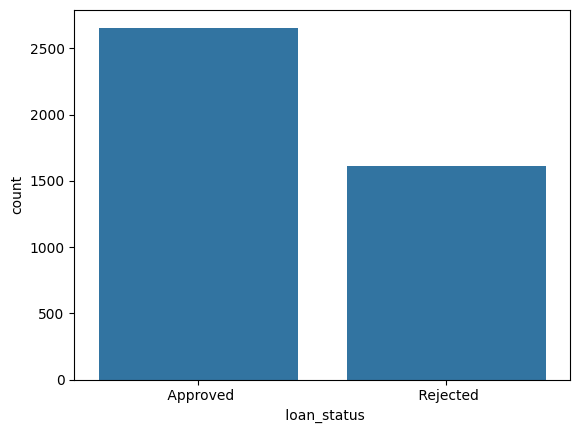

In [ ]:
sns.countplot(x=df[' loan_status'], data=df)

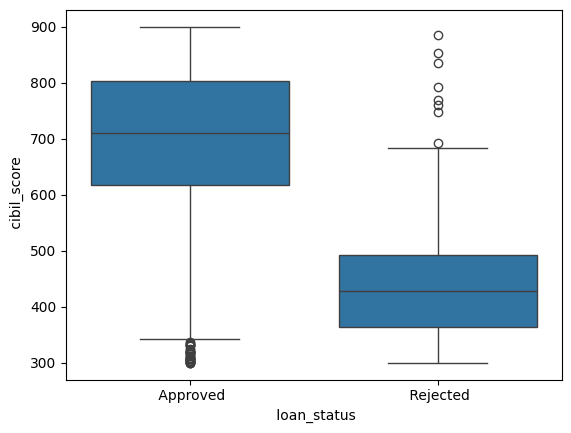

In [ ]:
sns.boxplot(x=' loan_status', y=' cibil_score', data=df)
plt.show()

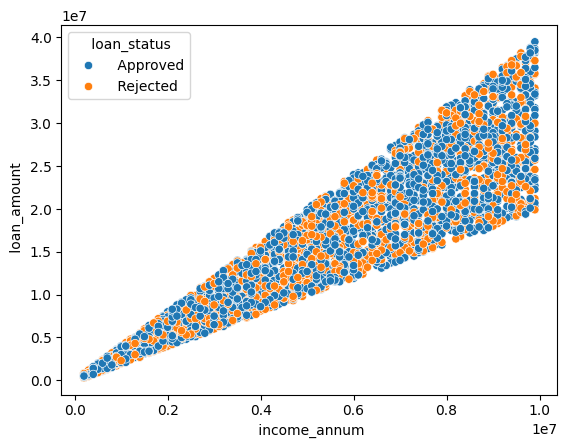

In [ ]:
sns.scatterplot(x=' income_annum', y=' loan_amount', hue=' loan_status', data=df)
plt.show()

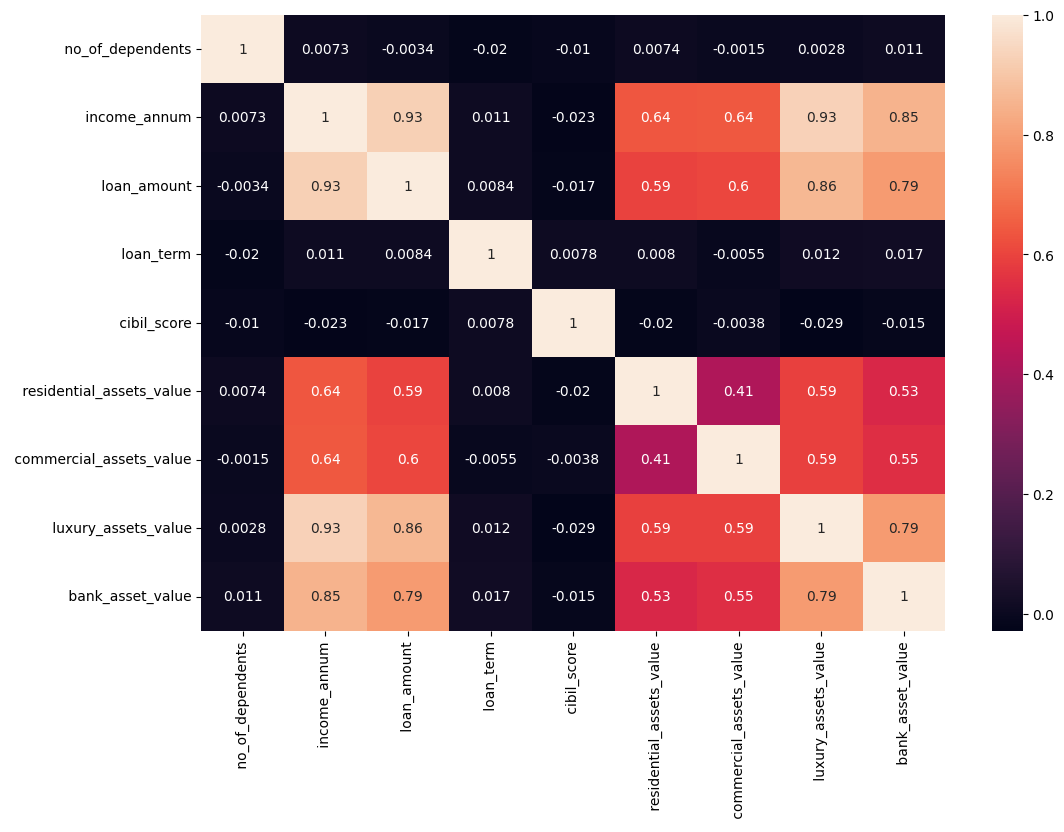

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


In [ ]:
df[' loan_status'] = df[' loan_status'].map({
    ' Approved':1,
    ' Rejected':0
})

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Count the no. of Graduate and Not Graduate & self_employed or not

In [ ]:
le = LabelEncoder()

df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


### Loan to income ratio for applicant

In [ ]:
df['loan_income_ratio'] = df[' loan_amount'] / df[' income_annum']

In [ ]:
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8957845433255269


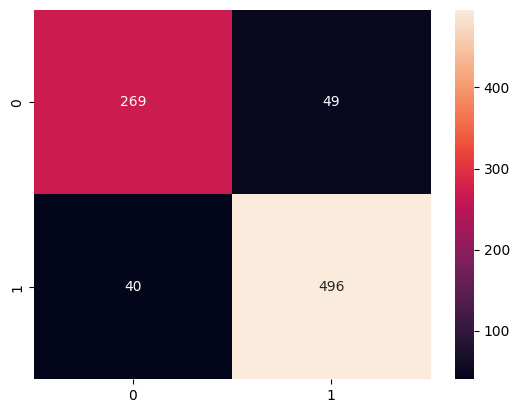

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       318
           1       0.91      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



In [ ]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


ROC AUC Score: 0.9686531962827373


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

feature_importance.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
6,cibil_score,4.222794
11,loan_income_ratio,0.533811
9,luxury_assets_value,0.310136
4,loan_amount,0.116180
10,bank_asset_value,0.113175
8,commercial_assets_value,0.092769
2,self_employed,0.059546
7,residential_assets_value,0.037234
0,no_of_dependents,-0.024991
1,education,-0.027455


### 1. Define the New Loan Application Data

First, let's create an example of new loan application data. Ensure the column names and order are consistent with the `X` DataFrame used for training (after dropping `loan_id` and `loan_status`).

In [ ]:
new_loan_data = {
    ' no_of_dependents': 2,
    ' education': 'Graduate',
    ' self_employed': 'No',
    ' income_annum': 9600000,
    ' loan_amount': 29900000,
    ' loan_term': 12,
    ' cibil_score': 778,
    ' residential_assets_value': 2400000,
    ' commercial_assets_value': 17600000,
    ' luxury_assets_value': 22700000,
    ' bank_asset_value': 8000000
}

# Convert to DataFrame
new_df = pd.DataFrame([new_loan_data])
display(new_df)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,1,960000,95000000,12,750,0,0,0,800000


### 1. Configure Git with your identity

First, set your Git username and email. This information will be associated with your commits. Remember to replace `"your_email@example.com"` and `"Your Name"` with your actual details.

In [ ]:
!git config --global user.email "yash_bhoskar31@outlook.com"
!git config --global user.name "yashbhoskar"

### 2. Initialize a Git repository

Navigate to the directory where your notebook is saved (e.g., `/content/` if you've downloaded and re-uploaded it there, or your mounted Google Drive folder if you intend to push from there) and initialize a new Git repository.

In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


### 3. Stage and commit your notebook

Add your `.ipynb` notebook file (and any other relevant files) to the staging area, then commit them to your local repository. Replace `your_notebook_name.ipynb` with the actual name of your notebook file. You can use `!ls` or `!pwd` to check your current directory and file names.

In [ ]:
import shutil
shutil.copy('/content/Predicting_Loan_Approval.ipynb', '/content/YOUR_REPO/')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Predicting_Loan_Approval.ipynb'

In [ ]:
!git add Predicting_Loan_Approval.ipynb
!git commit -m "loan Prediction intial commit "

fatal: pathspec 'Predicting_Loan_Approval.ipynb' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


### 4. Link to your GitHub repository

Add your GitHub repository as a remote origin. Replace `YOUR_GITHUB_USERNAME` and `YOUR_REPO_NAME` with your actual GitHub username and the name of the repository you created. Ensure the URL is correct for your repository.

In [ ]:
!git remote add origin https://github.com/YOUR_GITHUB_USERNAME/YOUR_REPO_NAME.git

### 5. Push your code to GitHub

Finally, push your committed changes from your local repository to your GitHub repository. You will likely be prompted to enter your GitHub username and a Personal Access Token (PAT). `master` might be `main` depending on your repo's default branch name.

In [ ]:
!git push -u origin master

### Important Note on Personal Access Tokens (PAT):

When pushing to GitHub from Colab, using a Personal Access Token (PAT) is the recommended and most secure authentication method, especially if you have two-factor authentication enabled on GitHub. You can generate a PAT in your GitHub settings (navigate to 'Settings' -> 'Developer settings' -> 'Personal access tokens'). Make sure to grant it the necessary scopes (e.g., `repo`) for pushing code.

### 2. Preprocess the New Data

Apply the same `LabelEncoder` and `StandardScaler` that were used on the training data. Also, create the `loan_income_ratio` feature.

In [ ]:
# Make a copy to avoid SettingWithCopyWarning
processed_new_df = new_df.copy()

# 1. Apply Label Encoding for ' education' and ' self_employed'
# Assuming 'le' (LabelEncoder) was already fitted on the training data.
# If 'le' is not available, you would need to refit it on the combined original data before using it here.

# Re-initialize LabelEncoder for education and self_employed if `le` is not available from previous cells
# If you have separate encoders for each column, use those.
# For this example, assuming the `le` object from earlier cells is available and was fitted on the full column.

# Since LabelEncoder was fitted on the full column, we need to make sure the categories are consistent.
# It's generally safer to fit separate encoders for each column or use OneHotEncoder.
# For simplicity, assuming the 'le' object is available and correctly maps 'Graduate'/'Not Graduate' and 'Yes'/'No'.

# Find the cell where LabelEncoder was fitted and reuse that object or recreate and fit it if it's lost.
# Based on cell `FA8qjKP4EAco`, a single `le` was used for both.
# The order of classes might be an issue if not handled carefully, but for 'Graduate'/'Not Graduate' and 'Yes'/'No', it usually aligns.

# To be robust, let's re-initialize and fit `le` on the unique values of the original columns if not already in scope.
# However, it's generally best practice to save and load fitted transformers.

# If `le` from FA8qjKP4EAco is still in scope:
processed_new_df[' education'] = le.transform(processed_new_df[' education'])
processed_new_df[' self_employed'] = le.transform(processed_new_df[' self_employed'])

# 2. Calculate 'loan_income_ratio'
processed_new_df['loan_income_ratio'] = processed_new_df[' loan_amount'] / processed_new_df[' income_annum']

# 3. Apply StandardScaler
# Assuming 'scaler' (StandardScaler) was already fitted on the X_train data.
# We need to transform the new data using the *same* scaler.

# Ensure column order matches X used for training
# This is important because the scaler and model expect features in a consistent order
aligned_new_df = processed_new_df[X.columns] # X.columns holds the order of features after training

scaled_new_data = scaler.transform(aligned_new_df)

display(pd.DataFrame(scaled_new_data, columns=X.columns).head())

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_income_ratio
0,-0.255997,1.002639,0.985176,-1.458981,8.807302,0.188894,0.869734,-1.141843,-1.133514,-1.655411,-1.283266,161.062208


### 3. Make Predictions

Now, use the trained `model` to predict the `loan_status` and the probability of approval.

In [ ]:
predicted_status = model.predict(scaled_new_data)
predicted_proba = model.predict_proba(scaled_new_data)[:, 1] # Probability of 'Approved' (class 1)

print(f"Predicted Loan Status (0=Rejected, 1=Approved): {predicted_status[0]}")
print(f"Probability of Approval: {predicted_proba[0]:.4f}")

if predicted_status[0] == 1:
    print("Conclusion: The loan is predicted to be Approved.")
else:
    print("Conclusion: The loan is predicted to be Rejected.")

Predicted Loan Status (0=Rejected, 1=Approved): 1
Probability of Approval: 1.0000
Conclusion: The loan is predicted to be Approved.
